# Naive Bayes

usamos la misma formula de toda la vida, pero ahora, dado que tenemos un pc, la calulamos de manera diferente  
tenemos un vector $\vec{x}$, y queremos calcular una probabilidad condicionada, ¿Cual es la probabilidad de "verdadero" dado que estamos en la posicion $\vec{x}$?  
(en el ejemplo "verdadero" = caminar)  
  
![bayes formula](../../assets/bayes_formula.png) 

$P(Walks)$ es facil de calcular, solo hay que calcular $\frac{gente \space camina}{gente \space total}$, que en nuestro caso sería contar los 1's de y_test y dividir por el total de elementos  
  
$P(\vec{x})$ es la probabilidad de que un punto (o vector) se encuentre en la posicion de $\vec{x}$, asi que lo que se hace es crear un radio donde se contará la cantidad de vectores cercanos (con características similares al vector $\vec{x}$) y se dividirá por los vectores totales (sin contar al vector $\vec{x}$)
  
![bayes formula](../../assets/bayes_px.png) 
  
Por último $P(\vec{x}|Walks)$ se calcula como $P(\vec{x})$ pero solo teniendo en cuenta a los puntos de grupo que camina
  
![bayes formula](../../assets/bayes_pxwalks.png) 

con todo lo anterior ya se puede calcular la probabilidad buscada, esto se hace para todos los puntos
  
Nota: dado que en mi caso solo hay 2 grupos (1's y 0's), solo es necesario calcular uno de los 2 grupos, el valor de la probabilidad del otro es su complemento (P(0) = 1 - P(1))
  
Nota2: si hay más grupos será necesario calcular todas las probabilidades, a excepción de si una es mayor al 50% (porque entonces ninguna de las otras será mayor al 50% y ya podemos tomar esa)

Nota3: dado que lo que hacemos es comparar probabilidades para decidir cual será mayor, y elegir esa como la clasificación que tendrá ese punto, entonces podemos obviar un término en común que tiene la fórmula de naive bayes
  
![bayes formula](../../assets/bayes_formula_simplificada.png) 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("../Social_Network_Ads.csv")

In [15]:
x = df.iloc[:, [2, 3]]
y = df.iloc[:, -1]

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/4, random_state= 0)

In [17]:
from sklearn.preprocessing import StandardScaler
ss_x = StandardScaler()
x_train = ss_x.fit_transform(x_train)
x_test = ss_x.transform(x_test)

In [18]:
# aplicamos naive bayes
from sklearn.naive_bayes import GaussianNB
clasificador = GaussianNB()
clasificador.fit(x_train, y_train)

GaussianNB()

In [19]:
# predecimos las compras
y_pred = clasificador.predict(x_test)

In [20]:
# veo que tal fueron los resultados con la matriz de confusion
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_pred, y_test)
confusionMatrix

array([[65,  7],
       [ 3, 25]])

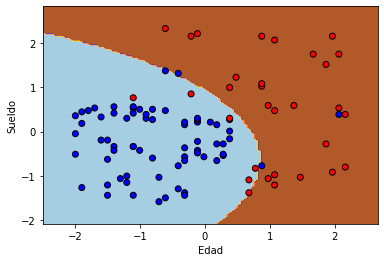

In [21]:
# podemos graficar los resultados con el metodo svm con la misma funcion que instalé antes
# en la clase habia mucho texto, pero encontré esta funcion en sklearn () advertencia, tener cuidado porque está en la rama inestable de sklearn (version 1.1 creo)
# la version estable es 1.0.2 creo, instalé la version inestable pa usar esto
from sklearn.inspection import DecisionBoundaryDisplay
DecisionBoundaryDisplay.from_estimator(
    clasificador,
    x_train,
    cmap=plt.cm.Paired,
    response_method="predict",
    #plot_method="pcolormesh",
    #shading="auto",
    eps=0.5,
)

# lo anterior solo plotea la linea y colorea los espacios, aqui pongo los puntos
# creo una lista de colores a partir de y_test
colores = ["red" if x != 0 else "blue" for x in y_test]
# aqui grafico usando la lista de colores (esdecolors="k" esta de bonito)
plt.scatter(x_test[:, 0], x_test[:, 1], color = colores, edgecolors="k")
plt.xlabel("Edad")
plt.ylabel("Sueldo")
plt.show()